##**DATA PRE-PROCESING**

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('AIDS_Classification.csv')
data.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


Setiap baris dalam dataset ini mewakili satu pasien, dan kolom-kolomnya merupakan atribut-atribut medis dan demografis yang diamati pada pasien tersebut. Dataset ini dapat digunakan untuk menganalisis faktor-faktor yang berhubungan dengan infeksi HIV/AIDS.

*   time: Durasi pengamatan atau waktu bertahan pasien (dalam hari).
*   trt: Jenis pengobatan yang diberikan (kategori).
*   age: Usia pasien saat pengamatan.
*   wtkg: Berat badan pasien dalam kilogram.
*   hemo: Kadar hemoglobin dalam darah pasien.
*   homo: Indikator apakah pasien termasuk homoseksual (1: ya, 0: tidak).
*   drugs: Indikator penggunaan narkoba (1: ya, 0: tidak).
*   karno: Skor Karnofsky (menggambarkan kemampuan fungsional pasien; semakin tinggi, semakin baik kondisi pasien).
*   oprior: Jumlah obat yang digunakan sebelum studi dimulai.
*   z30: Indikator terkait jumlah CD4 pada minggu ke-30 (1: <75, 0: lainnya).
*   str2: Strategi pengobatan yang digunakan (kategori).
*   strat: Stratifikasi pasien berdasarkan status kesehatan tertentu (kategori).
*   symptom: Indikator apakah pasien memiliki gejala (1: ya, 0: tidak).
*   symptom: Indikator apakah pasien memiliki gejala (1: ya, 0: tidak).
*   treat: Indikator apakah pasien mendapatkan perlakuan spesifik (1: ya, 0: tidak).

*   offtrt: Indikator apakah pasien menghentikan pengobatan (1: ya, 0: tidak).
*   cd40: Jumlah sel CD4 pada minggu ke-40.
*   cd420: Jumlah sel CD4 pada minggu ke-20.
*   cd80: Jumlah sel CD8 pada minggu ke-0.
*   cd820: Jumlah sel CD8 pada minggu ke-20.
*   infected: Variabel target yang menunjukkan status infeksi pasien (1: terinfeksi, 0: tidak terinfeksi).

Dataset ini memberikan informasi penting dalam analisis prediktif untuk klasifikasi infeksi HIV/AIDS berdasarkan faktor klinis dan riwayat medis pasien.




In [ ]:
data.tail(5)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
2134,1091,3,21,53.2980,1,0,0,100,0,1,...,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,...,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,...,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,...,0,1,0,0,0,166,169,999,1838,1
2138,1045,3,45,77.3000,1,0,0,100,0,0,...,0,1,0,1,0,911,930,885,526,0


In [ ]:
#melihat statistika deskriptif
data.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

Berdasarkan output di atas, dapat disimpulkan bahwa dataset tersebut memiliki total: **23 kolom**.  
Kolom-kolom pada dataset tersebut memiliki dua tipe data, yaitu: **integer (`int64`) dan float (`float64`)**. Dengan demikian, **tidak perlu dilakukan proses Encoding Data** karena tidak terdapat tipe data kategorikal dalam bentuk string.

Jumlah maksimal baris untuk setiap kolom adalah: **2139 baris**, dan **seluruh kolom memiliki jumlah baris lengkap (2139 baris)**, sehingga **tidak perlu dilakukan penanganan terhadap missing value**.  

Dataset ini sudah dalam format yang bersih dan siap untuk tahap eksplorasi data atau pemodelan lebih lanjut.

**DETEKSI OUTLIER**

Outlier dapat dideteksi menggunakan beberapa metode:


*   Boxplot → Visualisasi distribusi dan outlier
*   Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil

**1. Box Plot**

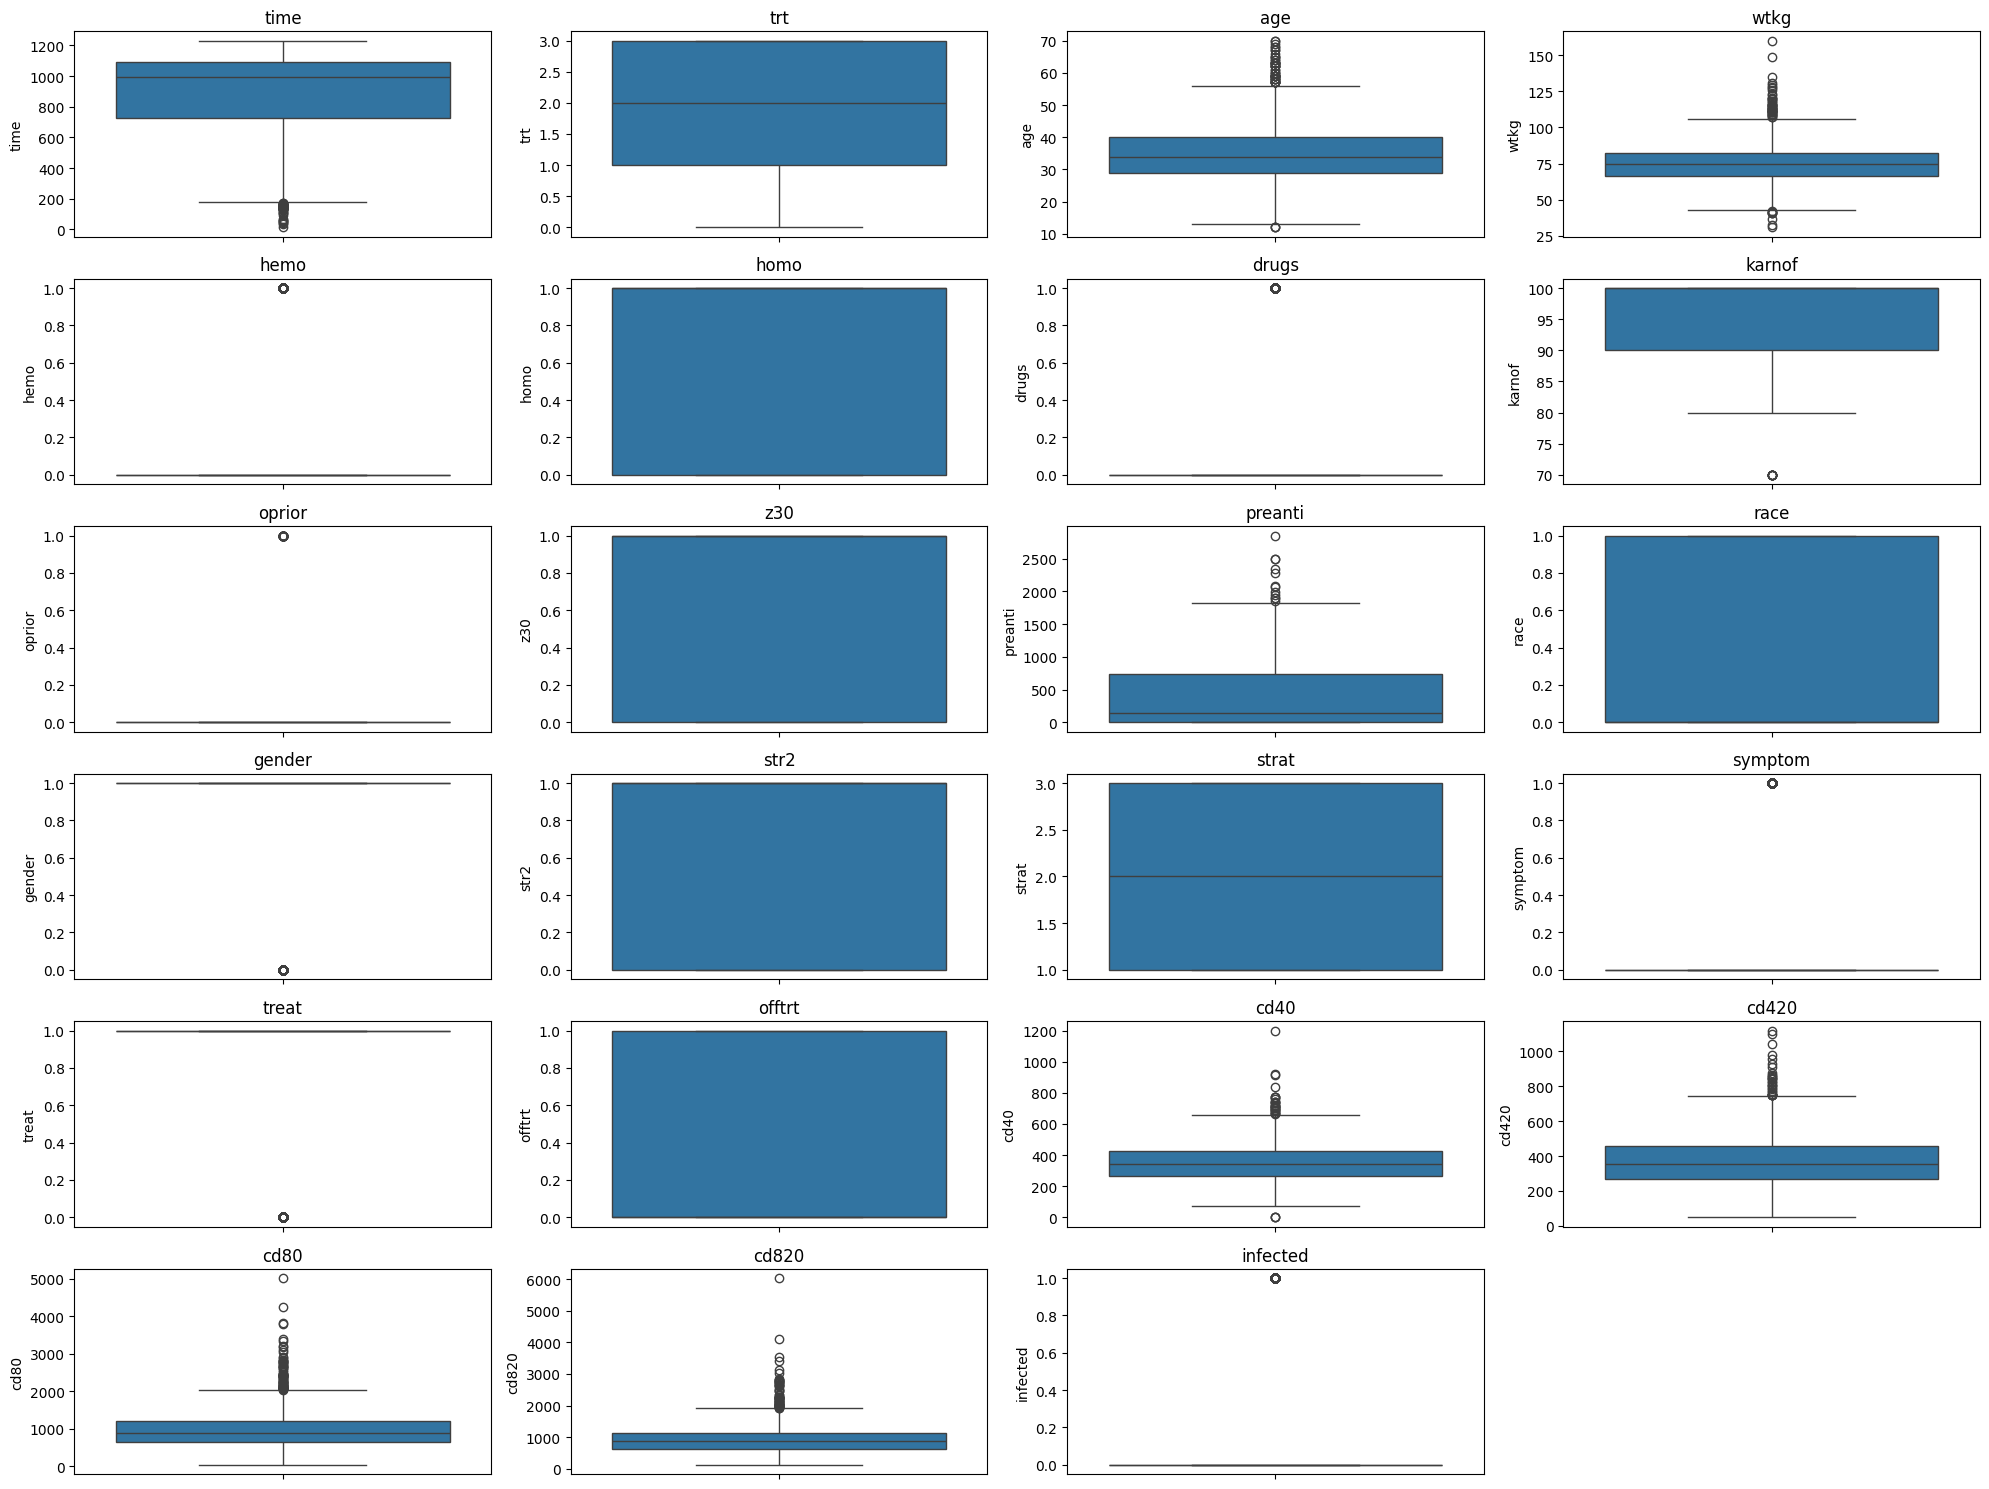

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya (semua kolom numerik dalam dataset Anda)
num_cols = ['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior',
            'z30', 'preanti', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat',
            'offtrt', 'cd40', 'cd420', 'cd80', 'cd820', 'infected']

# Visualisasi Boxplot
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**2. IQR**

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

time: 49 outliers
trt: 0 outliers
age: 52 outliers
wtkg: 54 outliers
hemo: 180 outliers
homo: 0 outliers
drugs: 281 outliers
karnof: 9 outliers
oprior: 47 outliers
z30: 0 outliers
preanti: 12 outliers
race: 0 outliers
gender: 368 outliers
str2: 0 outliers
strat: 0 outliers
symptom: 370 outliers
treat: 532 outliers
offtrt: 0 outliers
cd40: 31 outliers
cd420: 30 outliers
cd80: 71 outliers
cd820: 59 outliers
infected: 521 outliers


Keberadaan outlier dapat memiliki dampak yang signifikan terhadap analisis data. Keberadaan outlier dapat mengubah nilai rata-rata, median, mengubah distribusi data, mengurangi akurasi model, mengubah hasil uji statistik, dan menghambat proses analisis. Sehingga perlu dilakukan penanganan terhadap outlier pada suatu data.

**Penanganan Outlier**
Metode yang paling tepat untuk menangani kasus di atas adalah Winsorizing yaitu Mengganti Outlier dengan Batas IQR. Hal ini dikarenakan keberadaan data sangat penting dan tidak boleh dihapus. Selain itu nilai dari outlier yang ada juga cukup signifikan. Dengan demikian Winsorizing adalah metode yang tepat.

##**A. Winsorizing (Mengganti Outlier dengan Batas IQR)**

In [ ]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Gantilah hanya nilai outlier, sisanya tetap
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound
                                       else upper_bound if x > upper_bound
                                       else x)

# Salin data agar tidak ubah data asli
data_iqr_winsorized = data.copy()

# Terapkan Winsorizing berbasis IQR ke semua kolom numerik
for col in num_cols:
    winsorize_iqr(data_iqr_winsorized, col)


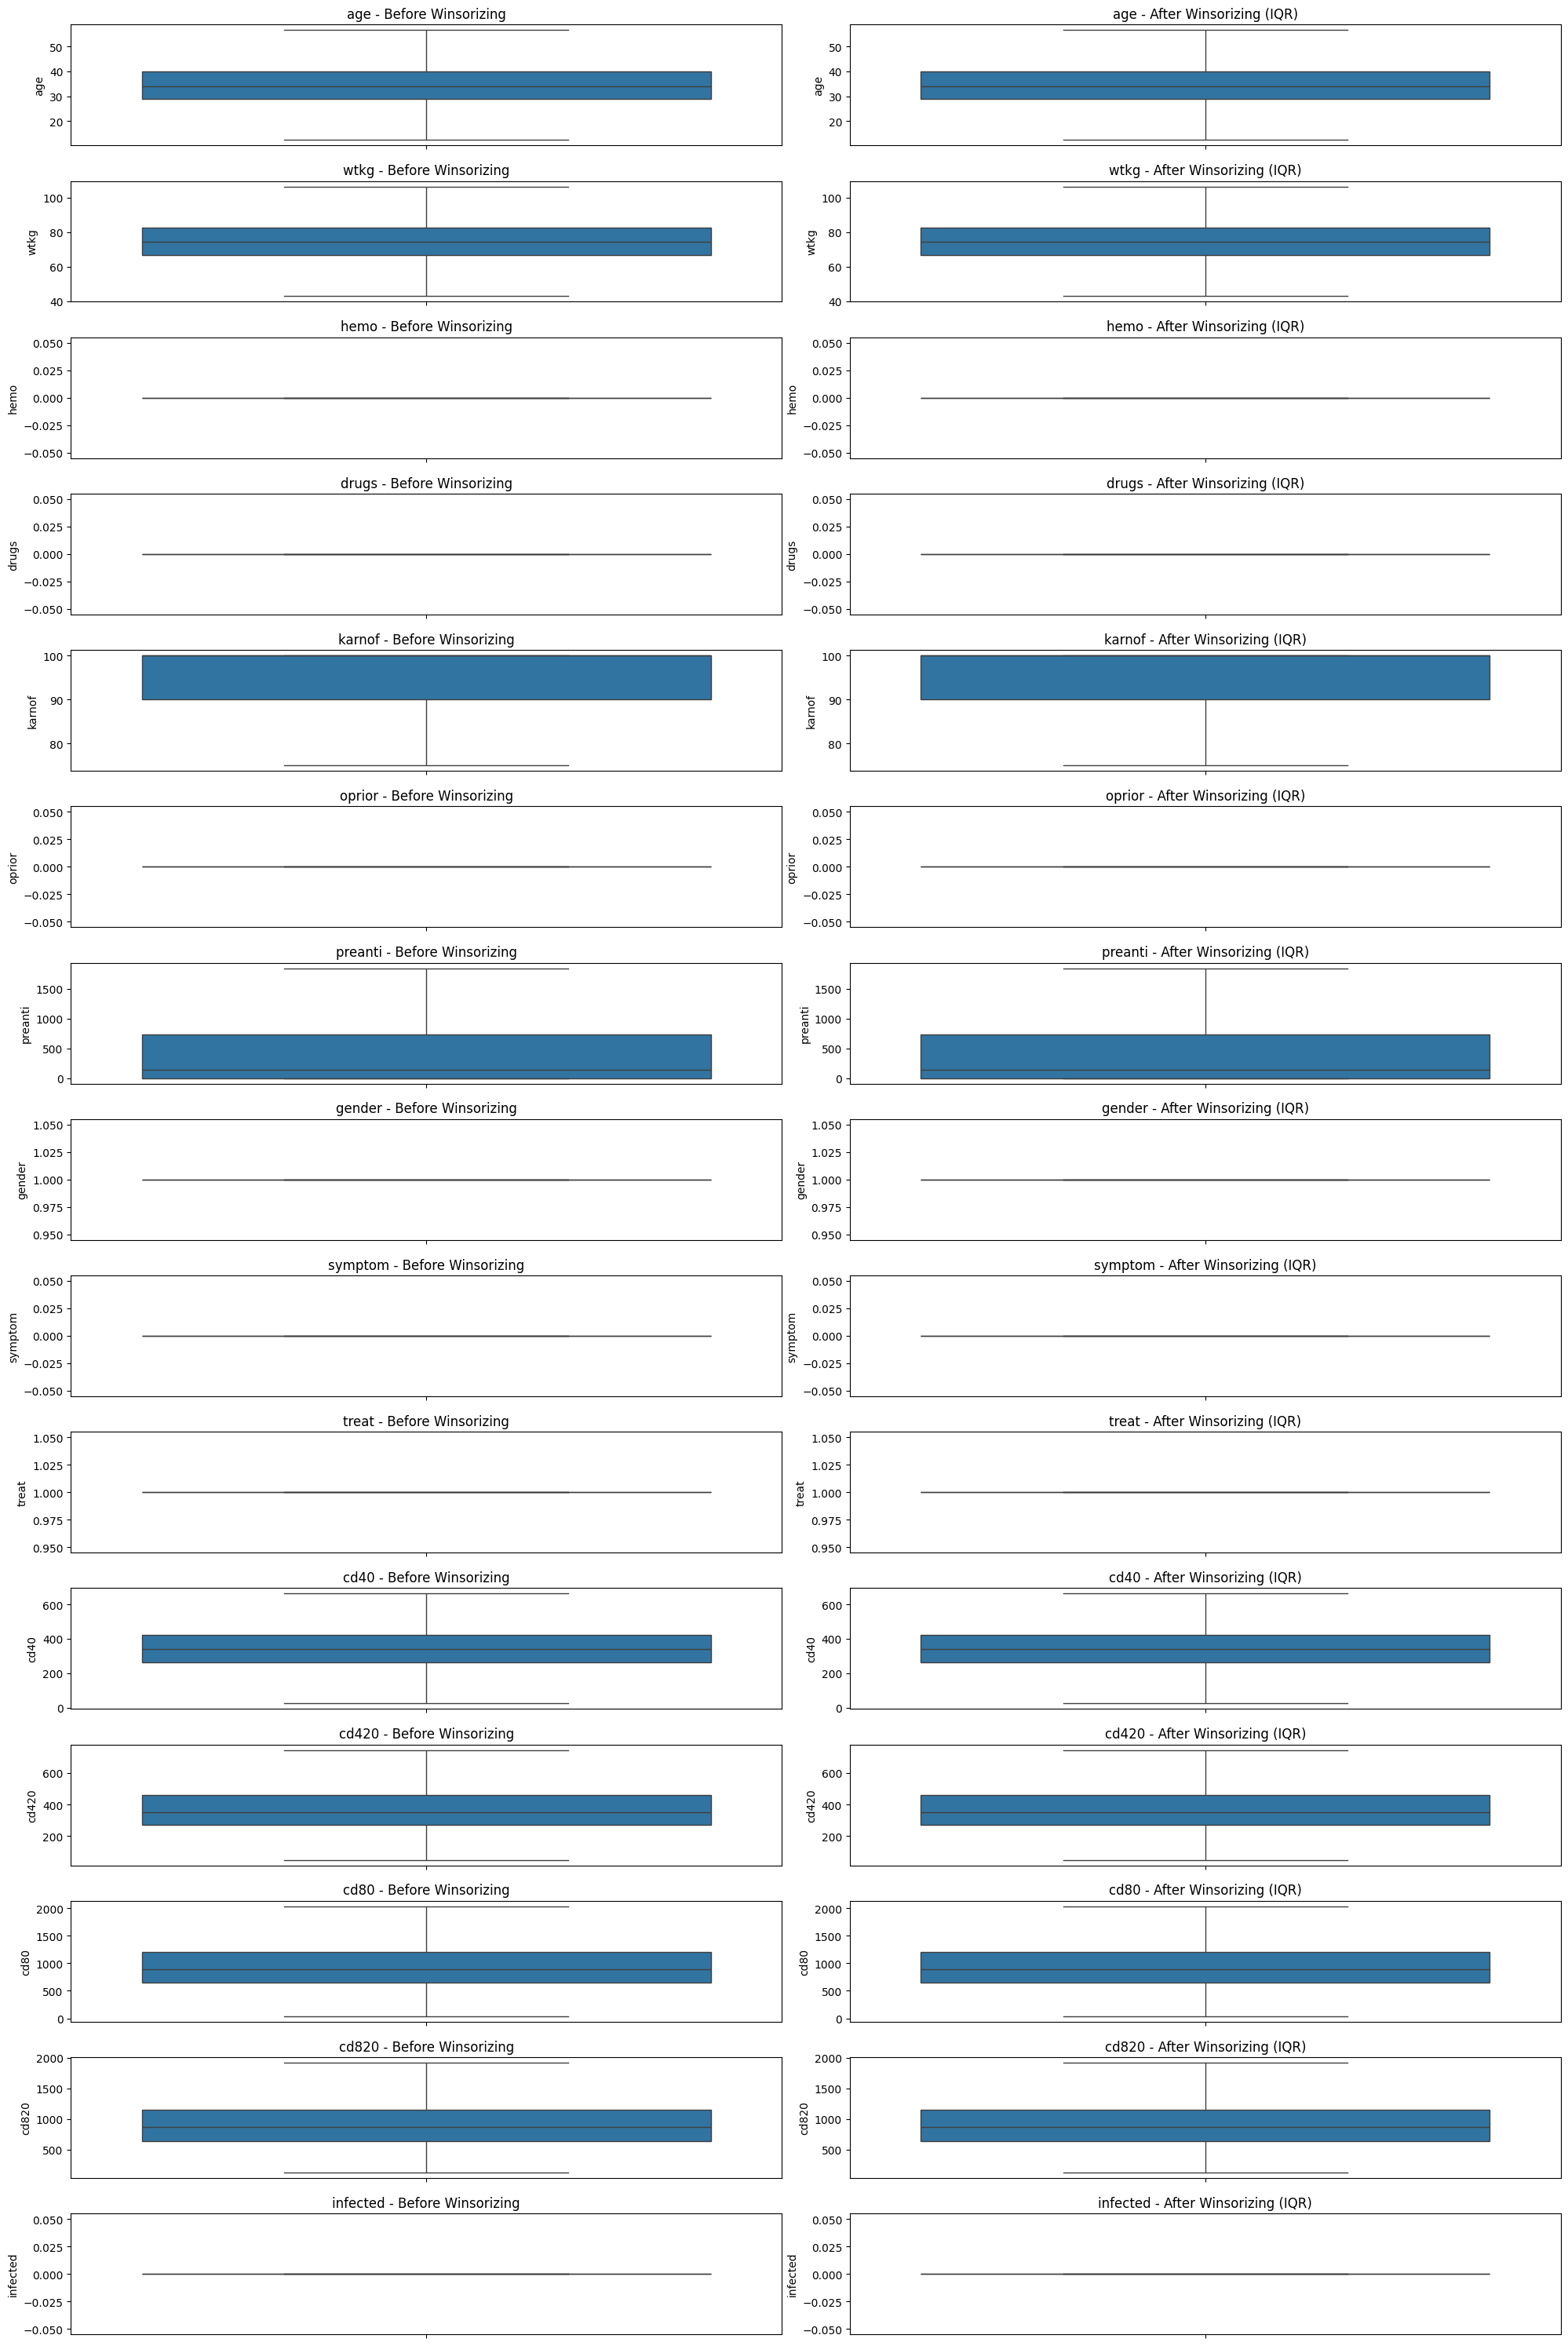

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 30))

for i, col in enumerate(num_cols):
    # Sebelum
    plt.subplot(len(num_cols), 2, 2*i+1)
    sns.boxplot(y=data[col])
    plt.title(f"{col} - Before Winsorizing")

    # Sesudah
    plt.subplot(len(num_cols), 2, 2*i+2)
    sns.boxplot(y=data_iqr_winsorized[col])
    plt.title(f"{col} - After Winsorizing (IQR)")

plt.tight_layout()
plt.show()

##**K-NEAREST NEIGHBORS**

**Splitting the dataset into the training set and test set**

Proses split dataset dilakukan untuk memisahkan data menjadi dua bagian utama, yaitu data training dan data testing. Data training merupakan bagian dari dataset yang digunakan untuk melatih model dalam proses pembelajaran mesin. Pada tahap ini, model belajar mengenali pola dan hubungan antara fitur (variabel independen) dan label atau target yang diinginkan (variabel dependen). Melalui data training, model menyesuaikan parameter-parameter internalnya agar mampu membuat prediksi yang akurat terhadap data baru di masa mendatang.

Di sisi lain, data testing (atau data uji) adalah bagian dari dataset yang tidak digunakan selama proses pelatihan, tetapi digunakan untuk mengevaluasi performa model yang telah dilatih. Data ini membantu mengukur kemampuan model dalam menggeneralisasi, yaitu memprediksi dengan benar pada data yang belum pernah dilihat sebelumnya. Pengujian dengan data testing memastikan bahwa model tidak hanya menghafal data pelatihan, melainkan mampu mengenali pola umum yang berlaku pada data baru.

**Proporsi Pembagian Data**

Keputusan mengenai besarnya porsi data yang dialokasikan untuk training dan testing sangat penting untuk membangun model yang andal. Tidak ada aturan baku mengenai persentase pasti yang harus digunakan, namun ada praktik umum yang sering diterapkan:

*   Pembagian Standar: Biasanya, data dibagi menjadi 70% untuk training dan 30% untuk testing, atau 80% untuk training dan 20% untuk testing. Pembagian ini merupakan titik awal yang baik dalam banyak kasus.
*   Dataset Besar: Jika dataset sangat besar, pembagian seperti 90% untuk training dan 10% untuk testing, bahkan 95% dan 5%, dapat dipertimbangkan. Hal ini memungkinkan model mendapatkan cukup data untuk belajar secara efektif, sambil tetap memiliki data yang cukup untuk evaluasi performa.

**split dataset dengan ukuran 80:20**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('infected', axis=1)
y = data['infected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2139
Total # of sample in train dataset: 1711
Total # of sample in test dataset: 428


In [ ]:
print(X_train)

        time  trt   age      wtkg  hemo  homo  drugs  karnof  oprior  z30  \
1785  1013.0  2.0  29.0   94.8024   0.0   0.0    0.0    90.0     0.0  0.0   
2121  1097.0  0.0  24.0   71.0000   0.0   0.0    0.0   100.0     0.0  1.0   
192    982.0  0.0  35.0   74.3904   0.0   0.0    0.0    90.0     0.0  1.0   
678   1090.0  2.0  33.0   88.2252   0.0   1.0    0.0    90.0     0.0  0.0   
486    999.0  3.0  30.0   73.9368   0.0   1.0    0.0   100.0     0.0  0.0   
...      ...  ...   ...       ...   ...   ...    ...     ...     ...  ...   
1638   876.0  0.0  36.0  106.3692   0.0   0.0    0.0    90.0     0.0  0.0   
1095  1055.0  0.0  44.0   83.9160   0.0   1.0    0.0   100.0     0.0  1.0   
1130   898.0  1.0  30.0   64.5000   0.0   1.0    0.0   100.0     0.0  1.0   
1294   318.0  1.0  34.0   68.2668   0.0   1.0    0.0    90.0     0.0  1.0   
860    487.0  2.0  44.0  102.1000   0.0   1.0    0.0    80.0     0.0  0.0   

      ...  gender  str2  strat  symptom  treat  offtrt   cd40  cd420    cd8

In [ ]:
print(y_train)

1785    0.0
2121    0.0
192     0.0
678     0.0
486     0.0
       ... 
1638    0.0
1095    0.0
1130    0.0
1294    0.0
860     0.0
Name: infected, Length: 1711, dtype: float64


In [ ]:
print(X_test)

        time  trt   age      wtkg  hemo  homo  drugs  karnof  oprior  z30  \
70    1073.0  0.0  41.0  81.60000   0.0   0.0    0.0    90.0     0.0  1.0   
332    306.0  0.0  53.0  91.00000   0.0   0.0    0.0   100.0     0.0  0.0   
1558  1087.0  0.0  33.0  74.98008   0.0   1.0    0.0   100.0     0.0  1.0   
1304  1095.0  1.0  27.0  55.33920   0.0   0.0    0.0    90.0     0.0  1.0   
281   1004.0  1.0  22.0  71.66880   0.0   0.0    0.0    90.0     0.0  1.0   
...      ...  ...   ...       ...   ...   ...    ...     ...     ...  ...   
966    585.0  0.0  29.0  69.40080   0.0   0.0    0.0    90.0     0.0  1.0   
1748   932.0  2.0  30.0  77.79240   0.0   0.0    0.0   100.0     0.0  0.0   
1102  1159.0  1.0  39.0  81.64800   0.0   1.0    0.0    90.0     0.0  1.0   
305   1014.0  2.0  50.0  65.77200   0.0   1.0    0.0   100.0     0.0  0.0   
965    927.0  3.0  36.0  66.22560   0.0   0.0    0.0   100.0     0.0  1.0   

      ...  gender  str2  strat  symptom  treat  offtrt   cd40  cd420    cd8

In [ ]:
print(y_test)

70      0.0
332     0.0
1558    0.0
1304    0.0
281     0.0
       ... 
966     0.0
1748    0.0
1102    0.0
305     0.0
965     0.0
Name: infected, Length: 428, dtype: float64


**Feature Scaling**

Transformasi data dan normalisasi data perlu dilakukan agar data dapat digunakan dalam algoritma KNN maupun Naive Bayes

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 0.46571317  0.43324308 -0.71308882 ... -0.1394245   0.00773227
  -0.29509764]
 [ 0.75487058 -1.34867739 -1.30950813 ...  0.7503753  -0.49254345
  -0.31593229]
 [ 0.35900031 -1.34867739  0.00261435 ... -0.23908208  1.74916821
   0.5408926 ]
 ...
 [ 0.06984289 -0.45771715 -0.59380496 ... -0.55229161 -0.34246073
  -0.33676694]
 [-1.92672023 -0.45771715 -0.11666952 ... -1.62005138  0.7676749
   0.18930792]
 [-1.34496304  0.43324308  1.0761691  ... -0.77296196 -0.59021632
  -0.97222369]]


In [ ]:
print(X_test.dtype)

float64


**Training the K-NN model on the Training set**

In [ ]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i-x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[] #calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1]) #sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get fist k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neigbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions

In [101]:
model=KNN(5)
model.fit(X_train,y_train)

5


In [102]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 45, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=45)

In [103]:
model = []
model.append(('KNN', KNeighborsClassifier()))

**Prediksi KNN berdasarkan model yang dibangun**

Modelling dengan KNN

In [104]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#definisikan nilai K dan buat objek KNN regressor
k = 45
knn = KNeighborsRegressor(n_neighbors=k)

#fitkan model KNN ke data train
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=45)

In [105]:
# Lakukan prediksi pada data train dan dataset
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Hitung MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE data train:", mse_train)
print("MSE data test:", mse_test)

MSE data train: 0.0
MSE data test: 0.0


Hasil Prediksi berdasarkan perhitungan Mean Squared Error

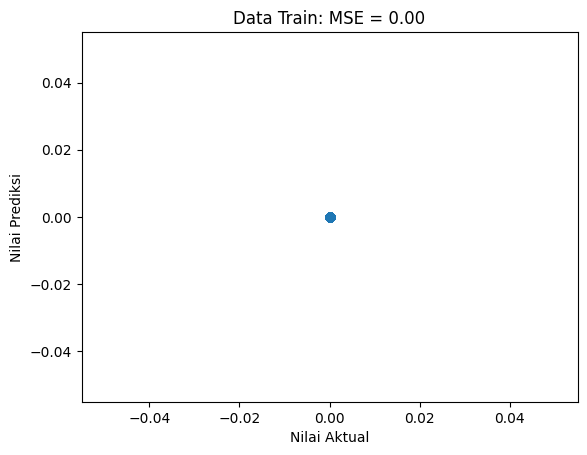

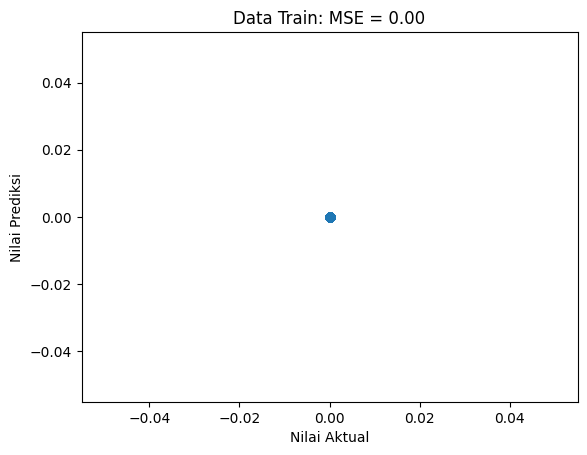

In [106]:
import matplotlib.pyplot as plt

# Plot data train
plt.scatter(y_train, y_pred_train)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

# Plot dataset
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

Kita akan menggunakan matplotlib untuk membuat scatter plot dari nilai aktual versus nilai prediksi untuk data train dan data test. Garis diagonal yang ditampilkan pada grafik menggambarkan situasi ideal di mana nilai aktual dan prediksi sama. Jika model KNN berhasil memprediksi dengan baik, titik akan membentuk pola yang hampil lurus mengikuti garis diagonal. Jika nilai MSE rendah, artinya model memiliki tingkat akurasi yang baik

**Hasil evaluasi (nilai akurasi Algoritma KNN) dan Confusion Matriks**

In [107]:
y_pred = classifier.predict(X_test)

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = knn.predict(X_test)

# Confusion matrix lengkap dengan labels
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[428   0]
 [  0   0]]
Accuracy Score: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       428

    accuracy                           1.00       428
   macro avg       1.00      1.00      1.00       428
weighted avg       1.00      1.00      1.00       428



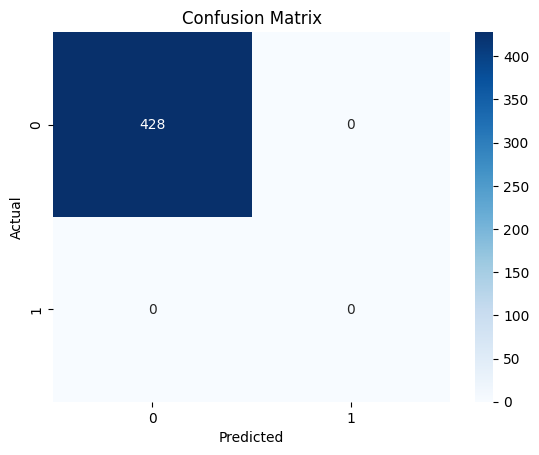

In [116]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Nilai akurasi algoritma KNN adalah 100%

##**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
# fit train set pakai Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# compute the accuracy of train set
nb.score(X_train, y_train)

1.0

In [ ]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [ ]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 1.0000


**Membuat model dengan Neural Network**

In [ ]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [ ]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 100}


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

Kode yang disediakan menggunakan MLPClassifier dari library Scikit-Learn untuk membuat model Neural Network berbasis Multi-Layer Perceptron (MLP) dengan parameter tertentu dan melatihnya pada data training.

Dalam kasus ini, model MLPClassifier dibuat dengan parameter-parameter tertentu yang telah ditentukan secara manual. Parameter-parameter tersebut adalah:

hidden_layer_sizes=(50,)
Ini adalah sebuah tuple yang menunjukkan arsitektur dari jaringan saraf. (50,) berarti model memiliki satu hidden layer dengan 50 neuron di dalamnya.

learning_rate_init=0.1
Parameter ini mengatur tingkat pembelajaran awal (learning rate). Nilai 0.1 berarti model akan melakukan penyesuaian bobot yang cukup besar berdasarkan kesalahan prediksi di setiap iterasi pelatihan.

max_iter=100
Menunjukkan jumlah maksimum iterasi (epoch) selama pelatihan. Model akan berhenti dilatih setelah 100 iterasi atau ketika konvergensi tercapai lebih awal.

Setelah model dibuat, fungsi clf.fit(X_train, y_train) digunakan untuk melatih model dengan data training, di mana X_train adalah fitur dan y_train adalah label targetnya.

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       428

    accuracy                           1.00       428
   macro avg       1.00      1.00      1.00       428
weighted avg       1.00      1.00      1.00       428



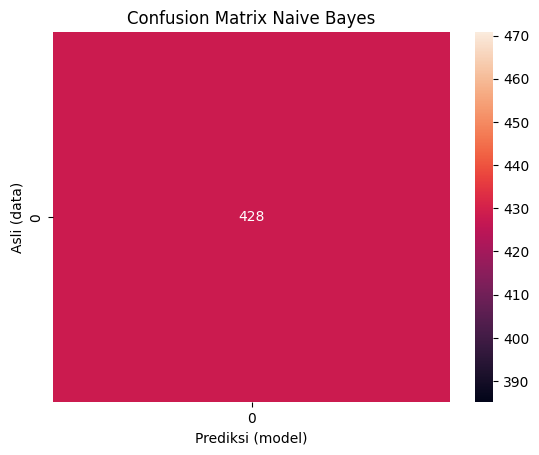

In [117]:
# Visualisasi Confusion Matrix
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='rocket')
plt.xlabel('Prediksi (model)')
plt.ylabel('Asli (data)')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

Gambar tersebut menunjukkan confusion matrix untuk model Naive Bayes. Nilai 428 pada diagram menunjukkan bahwa semua data uji berhasil diprediksi dengan benar, tanpa adanya kesalahan klasifikasi. Artinya, model memiliki performa yang sangat baik pada data uji ini, dengan akurasi 100%. Hasil ini juga menunjukkan bahwa model mampu mengklasifikasikan data dengan sangat presisi dan konsisten untuk kelas yang tersedia.

In [ ]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

1.0

Output 1.0 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 1.0 berarti bahwa model berhasil memprediksi dengan benar 100% dari semua sampel pada data uji (y_test) yang telah digunakan. Hasil ini nilainya sama dengan menggunakan KNN yaitu 100%. Jika model KNN dan Naive Bayes sama-sama menghasilkan akurasi sebesar 100% pada data uji, hal ini menunjukkan bahwa kedua model mampu melakukan klasifikasi dengan sangat baik terhadap dataset yang digunakan. Kemungkinan besar, dataset tersebut memiliki fitur-fitur yang sangat jelas dan informatif, sehingga memudahkan proses pemisahan antar kelas.
Berdasarkan hasil pengujian yang tersedia, **keduanya menunjukkan performa yang sangat baik**, namun jika mempertimbangkan aspek **kesederhanaan, kecepatan komputasi, dan efektivitas pada data berdistribusi probabilistik**, maka **Naive Bayes dapat dianggap sebagai pilihan yang lebih baik** dalam kasus ini.